# k-Nearest-Neighbour classifiers
Here we use the k-nearest-neighbor method on the converted data from the descriptive_analysis.ipynb.
As reference we use dataMining_R_8_ml.Rmd (./uebung/knn_uebung/) from the lecture.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import utils
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
data = pd.read_csv('./data/converted_test_2020_07_01_20-34-00.csv')
train = pd.read_csv('./data/converted_train_2020_07_01_20-34-00.csv')
train

,Unnamed: 0,Request_Date,Flight_Date,Duration_Time,Departure_hour,flight_unique_id,route_abb,flight_number,Price,Currency,min_future_price,price_in_eur,min_future_price_in_eur,Request_Weekday,Request_timeofday,Departure_timeofday,flight_distance_km,Request_hour
0,0,06/03/19,06/05/19,56.0,19,2019-06-05 FR 146,SXF-STN,FR 146,208.07,€,259.07,208.070000,259.070000,Monday,Morning,Evening,907.2,11
1,1,06/03/19,06/05/19,44.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Monday,Night,Evening,907.2,23
2,2,06/04/19,06/05/19,32.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Tuesday,Morning,Evening,907.2,11
3,3,06/04/19,06/05/19,20.0,19,2019-06-05 FR 146,SXF-STN,FR 146,259.07,€,259.07,259.070000,259.070000,Tuesday,Night,Evening,907.2,23
4,4,06/03/19,06/05/19,58.0,21,2019-06-05 FR 147,STN-SXF,FR 147,127.49,£,223.37,112.979088,197.946027,Monday,Morning,Night,907.2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83619,83619,08/01/19,09/10/19,959.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,35.69,€,39.69,35.690000,39.690000,Thursday,Morning,Morning,907.2,11
83620,83620,08/01/19,09/10/19,947.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€,39.69,46.830000,39.690000,Thursday,Night,Morning,907.2,23
83621,83621,08/02/19,09/10/19,935.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,46.83,€,39.69,46.830000,39.690000,Friday,Morning,Morning,907.2,11
83622,83622,08/02/19,09/10/19,923.0,10,2019-09-10 FR 8543,SXF-STN,FR 8543,39.69,€,39.69,39.690000,39.690000,Friday,Night,Morning,907.2,23


In [92]:
# Encode numeric columns
encoder = preprocessing.LabelEncoder()
train['min_future_price_in_eur'] = encoder.fit_transform(train['min_future_price_in_eur'])
train['Duration_Time'] = encoder.fit_transform(train['Duration_Time'])
train['price_in_eur'] = encoder.fit_transform(train['price_in_eur'])
train['flight_distance_km'] = encoder.fit_transform(train['flight_distance_km'])

data['Duration_Time'] = encoder.fit_transform(data['Duration_Time'])
data['price_in_eur'] = encoder.fit_transform(data['price_in_eur'])
data['flight_distance_km'] = encoder.fit_transform(data['flight_distance_km'])

In [93]:
train = pd.get_dummies(train, columns=['Request_Date', 'Flight_Date', 'flight_number', 'Request_Weekday', 'Request_timeofday', 'Departure_timeofday'], drop_first=True)
data = pd.get_dummies(data, columns=['Request_Date', 'Flight_Date', 'flight_number', 'Request_Weekday', 'Request_timeofday', 'Departure_timeofday'], drop_first=True)

In [94]:
# Drop columns we do not need from data
data_dropped = data.drop(columns=['route_abb', 'Currency', 'flight_unique_id', 'Price'])
data_dropped = data_dropped.loc[:, ~data_dropped.columns.str.contains('^Unnamed')]

# Drop columns we do not need from train
train_dropped = train.drop(columns=['route_abb', 'Currency', 'flight_unique_id', 'Price', 'min_future_price'])
train_dropped = train_dropped.loc[:, ~train_dropped.columns.str.contains('^Unnamed')]

In [95]:
print(data_dropped.head())
print(train_dropped.head())
train_dropped.to_csv('hello.csv', sep=',')

Duration_Time  Departure_hour  price_in_eur  flight_distance_km  \
0            278               7            34                   1   
1            273               7           142                   1   
2            268               7           145                   1   
3            263               7           145                   1   
4            258               7           143                   1   

   Request_hour  Request_Date_06/04/19  Request_Date_06/05/19  \
0            11                      0                      0   
1            23                      0                      0   
2            11                      1                      0   
3            23                      1                      0   
4            11                      0                      1   

   Request_Date_06/06/19  Request_Date_06/07/19  Request_Date_06/08/19  ...  \
0                      0                      0                      0  ...   
1                      0         

In [96]:
# Generate test and target / Figure out which features to drop. 'min_future_price_in_eur' needs to be dropped!
X = train_dropped.drop(columns=['min_future_price_in_eur'])
y = train_dropped['min_future_price_in_eur'].values
X

,Duration_Time,Departure_hour,price_in_eur,flight_distance_km,Request_hour,Request_Date_06/04/19,Request_Date_06/05/19,Request_Date_06/06/19,Request_Date_06/07/19,Request_Date_06/08/19,...,flight_number_FR 8545,Request_Weekday_Monday,Request_Weekday_Saturday,Request_Weekday_Sunday,Request_Weekday_Thursday,Request_Weekday_Tuesday,Request_Weekday_Wednesday,Request_timeofday_Night,Departure_timeofday_Morning,Departure_timeofday_Night
0,15,19,4463,1,11,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,10,19,4513,1,23,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,5,19,4513,1,11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,19,4513,1,23,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,17,21,3559,1,11,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83619,393,10,1375,1,11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
83620,388,10,1898,1,23,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
83621,383,10,1898,1,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
83622,378,10,1548,1,23,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [97]:
# Split dataset into train and test data (might want to try random_state=0 to randomize each calculation)
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((62718, 183), (62718,), (20906, 183), (20906,))

In [101]:
# We try to find the best value for k.
k_list = np.arange(1,20)
train_accuracy = np.empty(len(k_list))
test_accuracy = np.empty(len(k_list))

for i,k in enumerate(k_list):
    knn_test = KNeighborsClassifier(n_neighbors=k)
    knn_test.fit(X_train, y_train)
    train_accuracy[i] = knn_test.score(X_train, y_train)
    test_accuracy[i] = knn_test.score(X_cv, y_cv) 

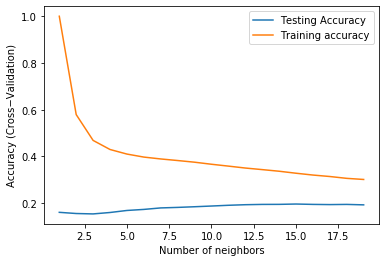

In [102]:
#Generate plot
plt.plot(k_list, test_accuracy, label='Testing Accuracy')
plt.plot(k_list, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy (Cross−Validation)')
plt.show()

In [103]:
knn = KNeighborsClassifier(n_neighbors=15)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy
knn.score(X_cv,y_cv)

NameError: name 'X_test' is not defined